In [1]:
import sys
import os
import talib 

# Go two levels up: from 'notebooks/task1/' to the project root
sys.path.append(os.path.abspath(os.path.join('..', '..')))




In [2]:
from src.data_loader import load_stock_data
filepath = r'C:\Users\ABC\Desktop\10Acadamy\week1\analysis-of-financial-news-data\data\yfinance_data\MSFT_historical_data.csv'
df_msft = load_stock_data(filepath)
print(df_msft.head())

✅ Pandas valid dates: 9672 / 9672
✅ Total valid after dateutil: 9672 / 9672
                  Date      Open      High       Low     Close  Adj Close  \
0  1986-03-13 00:00:00  0.088542  0.101563  0.088542  0.097222   0.059946   
1  1986-03-14 00:00:00  0.097222  0.102431  0.097222  0.100694   0.062087   
2  1986-03-17 00:00:00  0.100694  0.103299  0.100694  0.102431   0.063158   
3  1986-03-18 00:00:00  0.102431  0.103299  0.098958  0.099826   0.061552   
4  1986-03-19 00:00:00  0.099826  0.100694  0.097222  0.098090   0.060482   

       Volume  Dividends  Stock Splits  
0  1031788800        0.0           0.0  
1   308160000        0.0           0.0  
2   133171200        0.0           0.0  
3    67766400        0.0           0.0  
4    47894400        0.0           0.0  


In [3]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'MSFT': df_msft
}

print_all_date_ranges(stock_dfs)

MSFT: 1986-03-13 to 2024-07-30


In [4]:
# Assume your DataFrame is called df_news
# AAPL headline date range: 2020-03-09 to 2020-06-10

df_msft_news = df_msft[
    (df_msft['Date'] >= '2020-03-09') &
    (df_msft['Date'] <= '2020-06-10')
]


In [5]:
from src.date_range import print_all_date_ranges
stock_dfs = {
    'AAPL': df_msft_news
}

print_all_date_ranges(stock_dfs)

AAPL: 2020-03-09 to 2020-06-10


In [6]:
print("Null values count per column:")
print(df_msft.isnull().sum())


Null values count per column:
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


no valuse is null. ready to go!

In [7]:
df_msft_news.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,66,66.000000,66.000000,66.000000,66.000000,66.000000,6.600000e+01,66.000000,66.0
mean,2020-04-23 20:43:38.181818112,169.543788,172.799394,166.784092,169.930303,163.418732,4.892933e+07,0.007727,0.0
min,2020-03-09 00:00:00,137.009995,140.570007,132.520004,135.419998,130.141006,2.082690e+07,0.000000,0.0
25%,2020-03-31 06:00:00,155.607506,160.707504,151.409996,157.990005,151.831211,3.319870e+07,0.000000,0.0
50%,2020-04-23 12:00:00,174.395004,177.089996,172.389999,174.560005,167.755280,4.201785e+07,0.000000,0.0
75%,2020-05-17 06:00:00,182.702496,184.527504,181.432507,182.897499,176.149197,6.156922e+07,0.000000,0.0
max,2020-06-10 00:00:00,191.130005,198.520004,191.009995,196.839996,189.693588,9.322640e+07,0.510000,0.0
std,NaN,15.658479,14.090185,16.622953,15.817431,15.313334,1.955369e+07,0.062777,0.0


In [8]:
from src.missing_date import find_missing_dates
missing_dates = find_missing_dates(
    df_msft_news,
    date_col='Date',
    start_date='2020-03-09',
    end_date='2020-06-10',
    freq='D'
)

print("Missing dates:")
print(missing_dates)
print(f"Total missing: {len(missing_dates)}")

Missing dates:
DatetimeIndex(['2020-03-14', '2020-03-15', '2020-03-21', '2020-03-22',
               '2020-03-28', '2020-03-29', '2020-04-04', '2020-04-05',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-18',
               '2020-04-19', '2020-04-25', '2020-04-26', '2020-05-02',
               '2020-05-03', '2020-05-09', '2020-05-10', '2020-05-16',
               '2020-05-17', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-30', '2020-05-31', '2020-06-06', '2020-06-07'],
              dtype='datetime64[ns]', freq=None)
Total missing: 28


In [9]:
from src.missing_date import download_missing_yfinance_data
missing_dates =['2020-03-14', '2020-03-15', '2020-03-21', '2020-03-22',
               '2020-03-28', '2020-03-29', '2020-04-04', '2020-04-05',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-18',
               '2020-04-19', '2020-04-25', '2020-04-26', '2020-05-02',
               '2020-05-03', '2020-05-09', '2020-05-10', '2020-05-16',
               '2020-05-17', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-30', '2020-05-31', '2020-06-06', '2020-06-07']
download_missing_yfinance_data(missing_dates, ticker_symbol='AAPL', show_empty=True)

$AAPL: possibly delisted; no price data found  (1d 2020-03-14 -> 2020-03-15 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-03-15 -> 2020-03-16 00:00:00)


No data for 2020-03-14
No data for 2020-03-15


$AAPL: possibly delisted; no price data found  (1d 2020-03-21 -> 2020-03-22 00:00:00)


No data for 2020-03-21


$AAPL: possibly delisted; no price data found  (1d 2020-03-22 -> 2020-03-23 00:00:00)


No data for 2020-03-22


$AAPL: possibly delisted; no price data found  (1d 2020-03-28 -> 2020-03-29 00:00:00)


No data for 2020-03-28


$AAPL: possibly delisted; no price data found  (1d 2020-03-29 -> 2020-03-30 00:00:00)


No data for 2020-03-29


$AAPL: possibly delisted; no price data found  (1d 2020-04-04 -> 2020-04-05 00:00:00)


No data for 2020-04-04


$AAPL: possibly delisted; no price data found  (1d 2020-04-05 -> 2020-04-06 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-10 -> 2020-04-11 00:00:00)


No data for 2020-04-05
No data for 2020-04-10


$AAPL: possibly delisted; no price data found  (1d 2020-04-11 -> 2020-04-12 00:00:00)


No data for 2020-04-11


$AAPL: possibly delisted; no price data found  (1d 2020-04-12 -> 2020-04-13 00:00:00)


No data for 2020-04-12


$AAPL: possibly delisted; no price data found  (1d 2020-04-18 -> 2020-04-19 00:00:00)


No data for 2020-04-18


$AAPL: possibly delisted; no price data found  (1d 2020-04-19 -> 2020-04-20 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-04-25 -> 2020-04-26 00:00:00)


No data for 2020-04-19
No data for 2020-04-25


$AAPL: possibly delisted; no price data found  (1d 2020-04-26 -> 2020-04-27 00:00:00)


No data for 2020-04-26


$AAPL: possibly delisted; no price data found  (1d 2020-05-02 -> 2020-05-03 00:00:00)


No data for 2020-05-02


$AAPL: possibly delisted; no price data found  (1d 2020-05-03 -> 2020-05-04 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-09 -> 2020-05-10 00:00:00)


No data for 2020-05-03
No data for 2020-05-09


$AAPL: possibly delisted; no price data found  (1d 2020-05-10 -> 2020-05-11 00:00:00)


No data for 2020-05-10


$AAPL: possibly delisted; no price data found  (1d 2020-05-16 -> 2020-05-17 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-17 -> 2020-05-18 00:00:00)


No data for 2020-05-16
No data for 2020-05-17


$AAPL: possibly delisted; no price data found  (1d 2020-05-23 -> 2020-05-24 00:00:00)


No data for 2020-05-23


$AAPL: possibly delisted; no price data found  (1d 2020-05-24 -> 2020-05-25 00:00:00)


No data for 2020-05-24


$AAPL: possibly delisted; no price data found  (1d 2020-05-25 -> 2020-05-26 00:00:00)


No data for 2020-05-25


$AAPL: possibly delisted; no price data found  (1d 2020-05-30 -> 2020-05-31 00:00:00)
$AAPL: possibly delisted; no price data found  (1d 2020-05-31 -> 2020-06-01 00:00:00)


No data for 2020-05-30
No data for 2020-05-31


$AAPL: possibly delisted; no price data found  (1d 2020-06-06 -> 2020-06-07 00:00:00)


No data for 2020-06-06


$AAPL: possibly delisted; no price data found  (1d 2020-06-07 -> 2020-06-08 00:00:00)


No data for 2020-06-07


{}

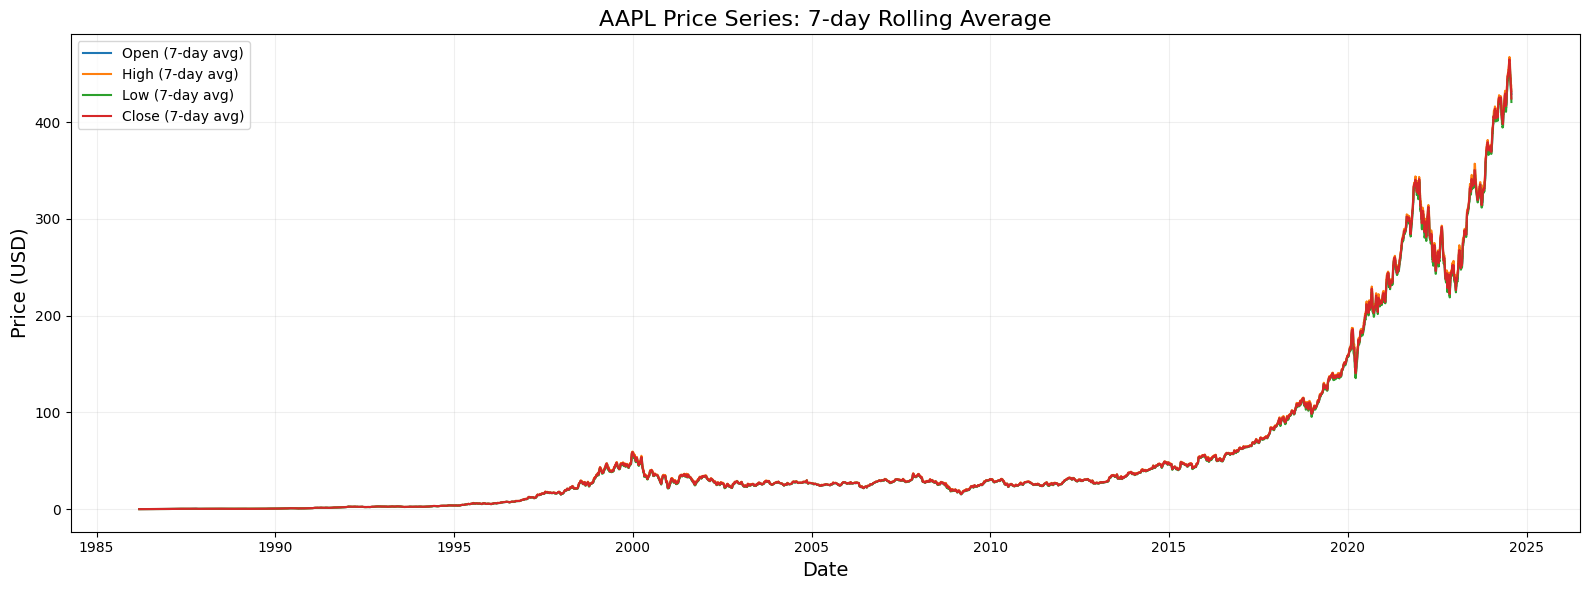

In [10]:
import matplotlib.pyplot as plt
from src.visualization import get_rolling_series

plt.figure(figsize=(16, 6))

for col in ['Open', 'High', 'Low', 'Close']:
    rolling_series = get_rolling_series(df_msft, value_col=col, window=7)
    plt.plot(
        rolling_series.index, 
        rolling_series.values, 
        label=f"{col.title()} (7-day avg)"
    )

plt.title("AAPL Price Series: 7-day Rolling Average", fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


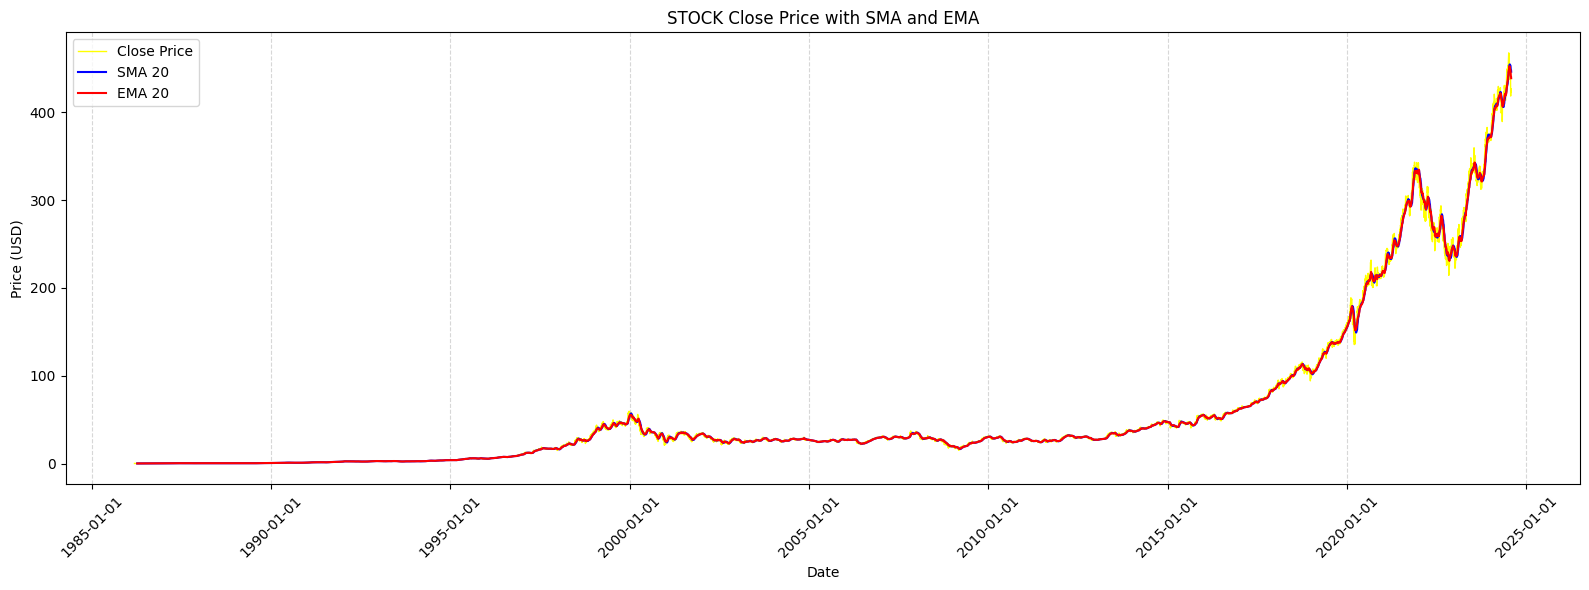

In [11]:
from src.plot_ma import plot_ma
plot_ma(df_msft, 'Close')

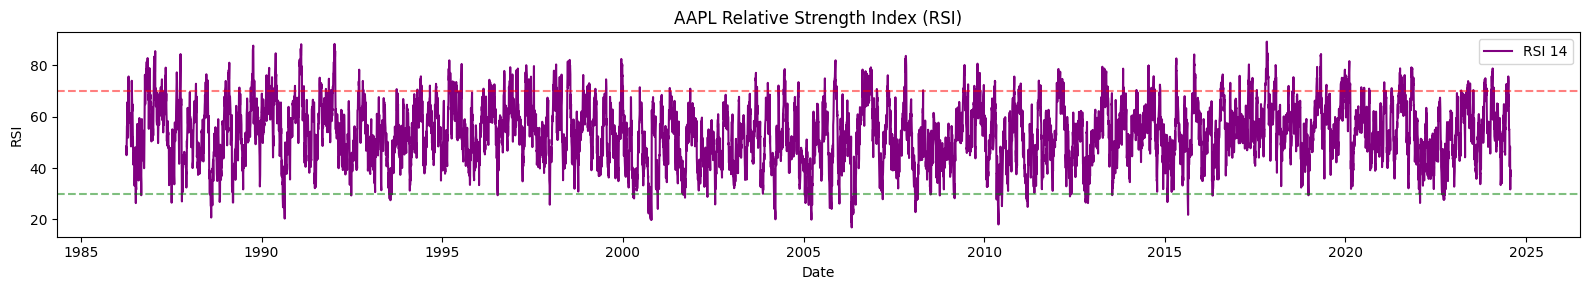

In [12]:
from src.plot_rsi import plot_rsi

# For Apple, using Close price:
plot_rsi(df_msft, price_col='Close', ticker_name='AAPL')




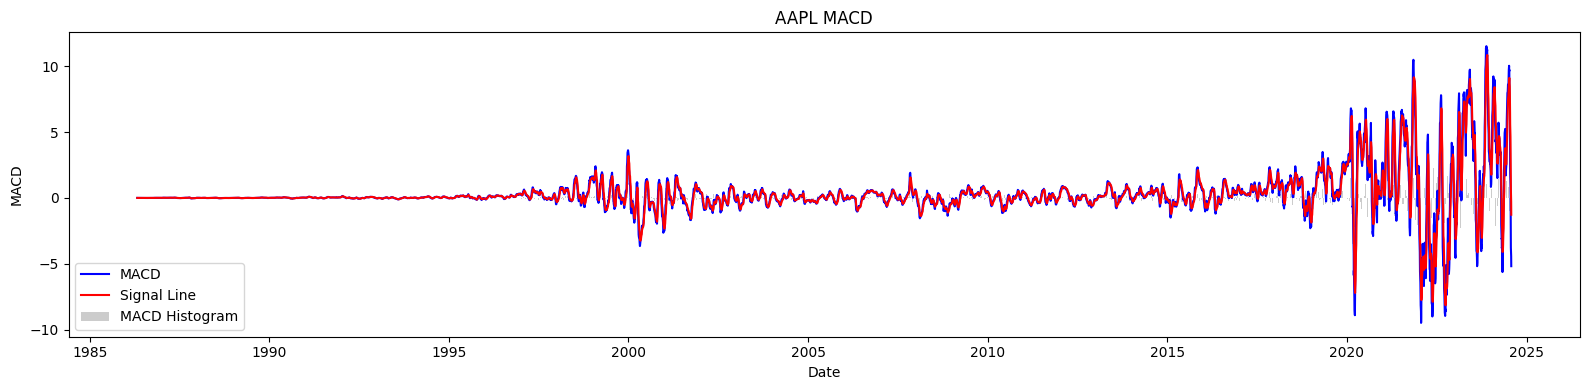

In [13]:
from src.plot_macd import plot_macd

# For Apple with Close price
plot_macd(df_msft, price_col='Close', ticker_name='AAPL')